## Chapter9P Input/Output operations

In [1]:
from pylab import plt, mpl
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
import pickle
import numpy as np
from random import gauss


In [3]:
a = [gauss(1.5, 2) for i in range(1000000)]

In [4]:
path = '/Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/'

In [5]:
pkl_file = open(path+ 'data.pkl', 'wb')

In [6]:
%time pickle.dump(a, pkl_file)

CPU times: user 6.43 ms, sys: 2.19 ms, total: 8.62 ms
Wall time: 7.98 ms


In [7]:
pkl_file.close()

In [8]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  9003247 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.pkl


In [9]:
pkl_file = open(path + 'data.pkl', 'rb')
# open the file for reading in binary mode(rb)

In [10]:
%time b = pickle.load(pkl_file)
# read the object from disk and deserializes it.

CPU times: user 8.82 ms, sys: 2.7 ms, total: 11.5 ms
Wall time: 11 ms


In [11]:
a[:3]

[2.0611015617766975, 1.9242038926482108, -0.3001395189469498]

In [12]:
b[:3]

[2.0611015617766975, 1.9242038926482108, -0.3001395189469498]

In [13]:
np.allclose(np.array(a), np.array(b))
# converting a and b to ndarray objects, np.allclose() verifies that both contain the same data (numbers)

True

In [14]:
pkl_file = open(path + 'data.pkl', 'wb')

In [15]:
%time pickle.dump(np.array(a), pkl_file)

CPU times: user 14.3 ms, sys: 1.08 ms, total: 15.4 ms
Wall time: 14.9 ms


In [16]:
%time pickle.dump(np.array(a)**2, pkl_file)

CPU times: user 19 ms, sys: 1.45 ms, total: 20.5 ms
Wall time: 21.3 ms


In [17]:
pkl_file.close()

In [18]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  16000326 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.pkl


In [19]:
pkl_file = open(path+'data.pkl', 'rb')

In [20]:
x= pickle.load(pkl_file)
x[:4]

array([ 2.06110156,  1.92420389, -0.30013952,  2.26769312])

In [21]:
y= pickle.load(pkl_file)
y[:4]

array([4.24813965, 3.70256062, 0.09008373, 5.14243209])

In [22]:
pkl_file.close()

In [23]:
pkl_file = open(path + 'data.pkl', 'wb')
pickle.dump({'x': x, 'y': y}, pkl_file) # stor a dict object containing the two ndarray objects. 
pkl_file.close()

In [24]:
pkl_file = open(path + 'data.pkl', 'rb')
data = pickle.load(pkl_file) # retrivevs the dict object
pkl_file.close()
for key in data.keys():
    print(key, data[key][:4])

x [ 2.06110156  1.92420389 -0.30013952  2.26769312]
y [4.24813965 3.70256062 0.09008373 5.14243209]


In [25]:
!rm -f $path*

In [26]:
import pandas as pd

In [27]:
rows = 5000
a = np.random.standard_normal((rows,5)).round(4)

In [28]:
a

array([[-1.2964, -0.4099,  0.1171,  1.1374, -0.3404],
       [-0.4171, -0.8479,  1.32  , -0.052 , -2.136 ],
       [-0.5843, -1.1459, -0.0692,  0.0815,  0.9815],
       ...,
       [-0.4103,  1.7829,  0.2623, -0.5174,  0.2135],
       [ 1.7939,  1.8389, -1.0535,  0.2058,  1.1167],
       [ 2.1909, -0.0781,  0.8759,  0.0115,  0.4067]], shape=(5000, 5))

In [29]:
t = pd.date_range(start='2019/1/1', periods=rows, freq='h')

In [30]:
t

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2019-07-27 22:00:00', '2019-07-27 23:00:00',
               '2019-07-28 00:00:00', '2019-07-28 01:00:00',
               '2019-07-28 02:00:00', '2019-07-28 03:00:00',
               '2019-07-28 04:00:00', '2019-07-28 05:00:00',
               '2019-07-28 06:00:00', '2019-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='h')

In [31]:
csv_file = open(path+'data.csv','w')

In [32]:
header = 'date,no1,no2,no3,no4,no5\n'
# opens a file for writing (w)

In [33]:
csv_file.write(header)
# define the header row (column labels) and writes it as the first line.

25

In [34]:
for t_, (no1, no2, no3, no4, no5) in zip(t,a):
    s = '{},{},{},{},{},{}\n'.format(t_, no1, no2, no3, no4, no5)
    csv_file.write(s)

In [35]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  279405 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/data.csv


In [36]:
csv_file = open (path+'data.csv', 'r')

In [37]:
for i in range(5):
    print(csv_file.readline(), end='')

date,no1,no2,no3,no4,no5
2019-01-01 00:00:00,-1.2964,-0.4099,0.1171,1.1374,-0.3404
2019-01-01 01:00:00,-0.4171,-0.8479,1.32,-0.052,-2.136
2019-01-01 02:00:00,-0.5843,-1.1459,-0.0692,0.0815,0.9815
2019-01-01 03:00:00,0.3997,1.8388,1.3566,-0.1898,-0.2453


In [38]:
csv_file.close()

In [39]:
csv_file = open(path + 'data.csv', 'r')

In [40]:
content = csv_file.readlines()

In [41]:
content[:5]

['date,no1,no2,no3,no4,no5\n',
 '2019-01-01 00:00:00,-1.2964,-0.4099,0.1171,1.1374,-0.3404\n',
 '2019-01-01 01:00:00,-0.4171,-0.8479,1.32,-0.052,-2.136\n',
 '2019-01-01 02:00:00,-0.5843,-1.1459,-0.0692,0.0815,0.9815\n',
 '2019-01-01 03:00:00,0.3997,1.8388,1.3566,-0.1898,-0.2453\n']

In [42]:
csv_file.close()

In [43]:
import csv
csv.field_size_limit(100000000)

131072

In [44]:
with open(path + 'data.csv', 'r') as f:
    csv_reader = csv.reader(f)
    lines = [line for line in csv_reader]

In [45]:
lines[:5]

[['date', 'no1', 'no2', 'no3', 'no4', 'no5'],
 ['2019-01-01 00:00:00', '-1.2964', '-0.4099', '0.1171', '1.1374', '-0.3404'],
 ['2019-01-01 01:00:00', '-0.4171', '-0.8479', '1.32', '-0.052', '-2.136'],
 ['2019-01-01 02:00:00', '-0.5843', '-1.1459', '-0.0692', '0.0815', '0.9815'],
 ['2019-01-01 03:00:00', '0.3997', '1.8388', '1.3566', '-0.1898', '-0.2453']]

In [46]:
with open(path+'data.csv','r') as f:
    csv_reader = csv.DictReader(f)
    lines = [line for line in csv_reader]

In [47]:
lines[:3]

[{'date': '2019-01-01 00:00:00',
  'no1': '-1.2964',
  'no2': '-0.4099',
  'no3': '0.1171',
  'no4': '1.1374',
  'no5': '-0.3404'},
 {'date': '2019-01-01 01:00:00',
  'no1': '-0.4171',
  'no2': '-0.8479',
  'no3': '1.32',
  'no4': '-0.052',
  'no5': '-2.136'},
 {'date': '2019-01-01 02:00:00',
  'no1': '-0.5843',
  'no2': '-1.1459',
  'no3': '-0.0692',
  'no4': '0.0815',
  'no5': '0.9815'}]

In [48]:
!rm -f $path*

In [49]:
import sqlite3 as sq3

In [50]:
con = sq3.connect(path+'numbs.db')
# open database connection; a file is created if it does not exist

In [51]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'
# A SQL query that creates a table with three columns

In [52]:
con.execute(query)
# executes the query


In [53]:
con.commit()
# and commits the changes

In [54]:
q = con.execute
# defines a short alias for the con.execute() method

In [55]:
q('SELECT * FROM sqlite_master').fetchall()
# fetches metainformation about the database, showing the just-created table as the single object.

[('table',
  'numbs',
  'numbs',
  2,
  'CREATE TABLE numbs (Date date, No1 real, No2 real)')]

In [56]:
import datetime

In [57]:
now = datetime.datetime.now()
q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12, 7.3))

/var/folders/ff/0rjbdk056r39pjbd0rm8g6440000gn/T/ipykernel_27592/3105697824.py:2: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes
  q('INSERT INTO numbs VALUES(?,?,?)', (now, 0.12, 7.3))


In [58]:
# writes a single row (or record) to the numbs table.
np.random.seed(100)

In [59]:
# create a larger dummy data set as an ndarray object
data = np.random.standard_normal((10000,2)).round(4)

In [60]:
%%time
# iterate over the rows of the ndarray object.
for row in data:
    now = datetime.datetime.now()
    q('INSERT INTO numbs VALUES(?,?,?)', (now, row[0], row[1]))
con.commit()
    

CPU times: user 17.3 ms, sys: 1.27 ms, total: 18.6 ms
Wall time: 18.3 ms


<timed exec>:4: DeprecationWarning: The default datetime adapter is deprecated as of Python 3.12; see the sqlite3 documentation for suggested replacement recipes


In [61]:
# Retrieves a number of rows from the table
q('SELECT * FROM numbs').fetchmany(4)

[('2026-01-12 15:07:17.405289', 0.12, 7.3),
 ('2026-01-12 15:07:17.416300', -1.7498, 0.3427),
 ('2026-01-12 15:07:17.416488', 1.153, -0.2524),
 ('2026-01-12 15:07:17.416506', 0.9813, 0.5142)]

In [62]:
q('SELECT * FROM numbs WHERE no1>0.5').fetchmany(4)

[('2026-01-12 15:07:17.416488', 1.153, -0.2524),
 ('2026-01-12 15:07:17.416506', 0.9813, 0.5142),
 ('2026-01-12 15:07:17.416576', 0.6727, -0.1044),
 ('2026-01-12 15:07:17.416674', 1.619, 1.5416)]

In [63]:
# define pointer object
pointer = q('SELECT * FROM numbs')

In [64]:
# ... that behaves like a generator object
for i in range(3):
    print(pointer.fetchone())

('2026-01-12 15:07:17.405289', 0.12, 7.3)
('2026-01-12 15:07:17.416300', -1.7498, 0.3427)
('2026-01-12 15:07:17.416488', 1.153, -0.2524)


In [65]:
# retrives all the remaining rows.
rows = pointer.fetchall()
rows[:3]

[('2026-01-12 15:07:17.416506', 0.9813, 0.5142),
 ('2026-01-12 15:07:17.416511', 0.2212, -1.07),
 ('2026-01-12 15:07:17.416565', -0.1895, 0.255)]

In [66]:
q('DROP TABLE IF EXISTS numbs')
#removes the table from database.

In [67]:
q('SELECT * FROM sqlite_master').fetchall()

[]

In [68]:
con.close()

In [69]:
!rm -f $path*

In [70]:
dtimes = np.arange('2019-01-01 10:00:00', '2025-12-31 22:00:00', dtype='datetime64[m]')

In [71]:
len(dtimes)

3681360

In [72]:
dty = np.dtype([('Date', 'datetime64[m]'),('No1','f'),('No2','f')])

In [73]:
data = np.zeros(len(dtimes), dtype=dty)

In [74]:
data['Date'] = dtimes
# populate data column

In [75]:
a = np.random.standard_normal((len(dtimes),2)).round(4)
# The dummy datasets

In [76]:
data['No1']= a[:,0]
data['No2'] = a[:,1]
#.. which populate the No1 and No2 columns

In [77]:
data.nbytes

58901760

In [78]:
%time np.save(path+'array', data)

CPU times: user 313 μs, sys: 4.83 ms, total: 5.14 ms
Wall time: 5.79 ms


In [79]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  58901952 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/array.npy


In [80]:
%time np.load(path+'array.npy')

CPU times: user 538 μs, sys: 7.26 ms, total: 7.8 ms
Wall time: 6.9 ms


array([('2019-01-01T10:00',  1.5131,  0.6973),
       ('2019-01-01T10:01', -1.722 , -0.4815),
       ('2019-01-01T10:02',  0.8251,  0.3019), ...,
       ('2025-12-31T21:57',  1.372 ,  0.6446),
       ('2025-12-31T21:58', -1.2542,  0.1612),
       ('2025-12-31T21:59', -1.1997, -1.097 )],
      shape=(3681360,), dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [81]:
%time data = np.random.standard_normal((10000,6000)).round(4)

CPU times: user 579 ms, sys: 37.1 ms, total: 616 ms
Wall time: 618 ms


In [82]:
data.nbytes

480000000

In [83]:
%time np.save(path+'array', data)

CPU times: user 297 μs, sys: 33.9 ms, total: 34.2 ms
Wall time: 50.5 ms


In [84]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  480000128 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/array.npy


In [85]:
%time np.load(path+'array.npy')

CPU times: user 480 μs, sys: 42.6 ms, total: 43 ms
Wall time: 42.2 ms


array([[ 0.3066,  0.5951,  0.5826, ...,  1.6773,  0.4294, -0.2216],
       [ 0.8769,  0.7292, -0.9557, ...,  0.5084,  0.9635, -0.4443],
       [-1.2202, -2.5509, -0.0575, ..., -1.6128,  0.4662, -1.3645],
       ...,
       [-0.5598,  0.2393, -2.3716, ...,  1.7669,  0.2462,  1.035 ],
       [ 0.273 ,  0.8216, -0.0749, ..., -0.0552, -0.8396,  0.3077],
       [-0.6305,  0.8331,  1.3702, ...,  0.3493,  0.1981,  0.2037]],
      shape=(10000, 6000))

In [86]:
!rm -f $path*

In [87]:
data = np.random.standard_normal((1000000,5)).round(4)

In [88]:
data[:3]

array([[ 0.4918,  1.3707,  0.137 ,  0.3981, -1.0059],
       [ 0.4516,  1.4445,  0.0555, -0.0397,  0.44  ],
       [ 0.1629, -0.8473, -0.8223, -0.4621, -0.5137]])

In [89]:
filename = path + 'numbers'

In [90]:
con = sq3.Connection(filename+'.db')

In [91]:
query = 'CREATE TABLE numbers (No1 real, No2 real, No3 real, No4 real, No5 real)'

In [92]:
q = con.execute
qm= con.executemany

In [93]:
q(query)

In [94]:
%%time
qm('INSERT INTO numbers VALUES (?,?,?,?,?)', data)
con.commit()

CPU times: user 555 ms, sys: 54.9 ms, total: 610 ms
Wall time: 626 ms


In [95]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db


In [96]:
%%time
# retrieves all the rows from the table in a single step
temp = q('SELECT * FROM numbers').fetchall()
print(temp[:3])

[(0.4918, 1.3707, 0.137, 0.3981, -1.0059), (0.4516, 1.4445, 0.0555, -0.0397, 0.44), (0.1629, -0.8473, -0.8223, -0.4621, -0.5137)]
CPU times: user 341 ms, sys: 24.9 ms, total: 366 ms
Wall time: 367 ms


In [97]:
%%time
# retrieves a selsctino of the rows and transforms it to an ndarray object.
query = 'SELECT * FROM numbers WHERE No1>0 AND No2 <0'
res = np.array((q(query).fetchall())).round(3)

CPU times: user 154 ms, sys: 14.1 ms, total: 168 ms
Wall time: 168 ms


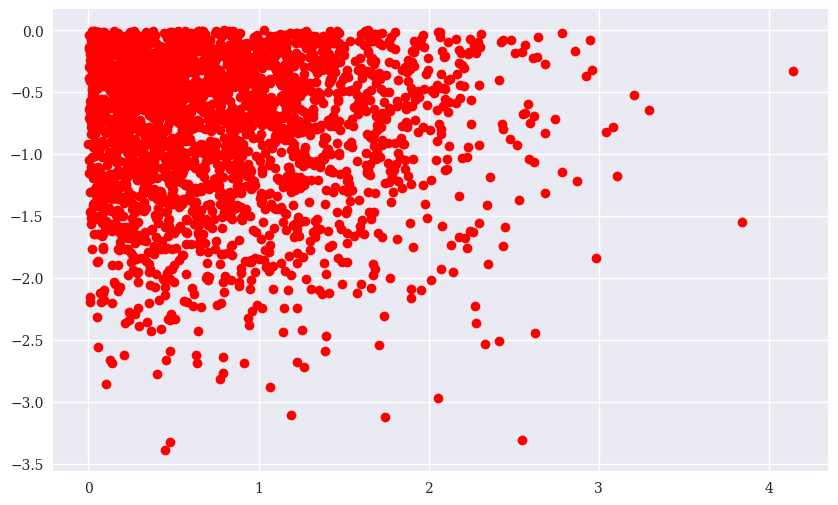

In [98]:
res = res[::100]
plt.figure(figsize=(10,6))
plt.plot(res[:,0], res[:,1],'ro')

Figure 9-1. Scatter plot of the query result (selection)

In [99]:
%time data = pd.read_sql('SELECT * FROM numbers',con)
# reads all the rows of the table into the DataFrame object named data

CPU times: user 467 ms, sys: 33.1 ms, total: 500 ms
Wall time: 501 ms


In [100]:
data.head()

,No1,No2,No3,No4,No5
0,0.4918,1.3707,0.1370,0.3981,-1.0059
1,0.4516,1.4445,0.0555,-0.0397,0.4400
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137
3,1.3064,0.9125,0.5142,-0.7868,-0.3398
4,-0.1148,-1.5215,-0.7045,-1.0042,-0.0600


In [101]:
%time data[(data['No1']>0)&(data['No2']<0).head()]

CPU times: user 38.3 ms, sys: 1.47 ms, total: 39.7 ms
Wall time: 39.2 ms


,No1,No2,No3,No4,No5
2,0.1629,-0.8473,-0.8223,-0.4621,-0.5137


In [102]:
%%time
q = '(No1<-0.5|No1>0.5)&(No2<-1|No2>1)'
res = data[['No1', 'No2']].query(q)

CPU times: user 14.3 ms, sys: 1.85 ms, total: 16.1 ms
Wall time: 12.8 ms


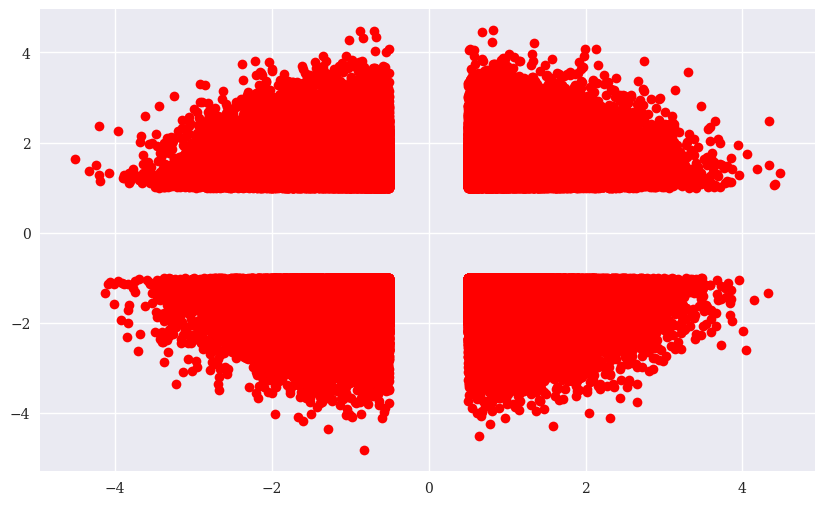

In [103]:
plt.figure(figsize=(10,6))
plt.plot(res['No1'], res['No2'], 'ro')

In [104]:
import tables as tb
h5s = pd.HDFStore(filename + '.h5s', 'w')
# this opens an HDF5 database fiel for writing; in pandas an HDFStore object is created.

In [105]:
%time h5s['data']=data
# the complete DataFrame object is stored in the database file via binary storage.

CPU times: user 7.34 ms, sys: 5.71 ms, total: 13 ms
Wall time: 12.7 ms


In [106]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s

In [107]:
h5s.close()

In [108]:
%%time
h5s = pd.HDFStore(filename+'.h5s','r')
data_ = h5s['data']
h5s.close()

CPU times: user 6.19 ms, sys: 4.26 ms, total: 10.5 ms
Wall time: 13.6 ms


In [109]:
data_ is data

False

In [110]:
(data_ == data).all()

No1    True
No2    True
No3    True
No4    True
No5    True
dtype: bool

In [111]:
np.allclose(data_, data)

True

In [112]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db
-rw-r--r--  1 youngsoom4pro  staff  48007240 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s


In [113]:
%time data.to_csv(filename+'.csv')

CPU times: user 1.32 s, sys: 38.7 ms, total: 1.36 s
Wall time: 1.36 s


In [114]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  43834157 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.csv
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db
-rw-r--r--  1 youngsoom4pro  staff  48007240 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s


In [115]:
%time df = pd.read_csv(filename+'.csv')

CPU times: user 161 ms, sys: 13.8 ms, total: 174 ms
Wall time: 175 ms


array([[<Axes: title={'center': 'No1'}>, <Axes: title={'center': 'No2'}>],
       [<Axes: title={'center': 'No3'}>, <Axes: title={'center': 'No4'}>]],
      dtype=object)

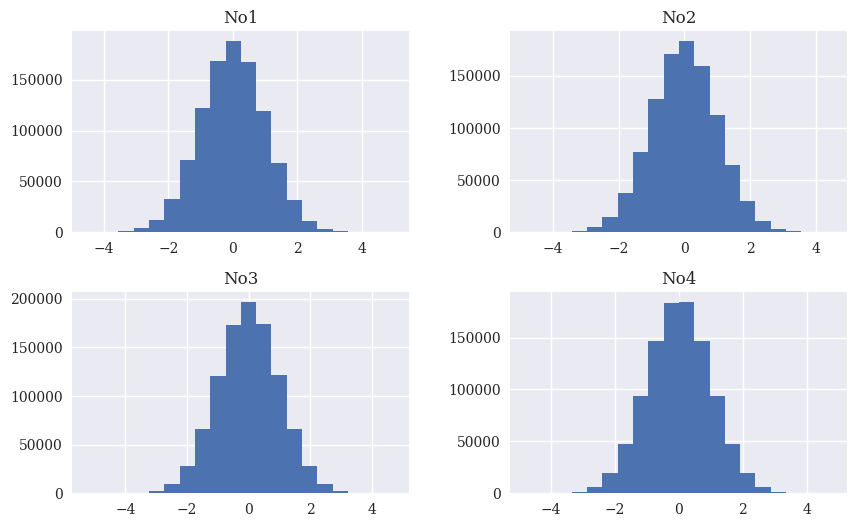

In [116]:
df[['No1', 'No2', 'No3', 'No4']].hist(bins=20, figsize=(10,6))

Figure 9-3. Histograms for selected columns
 

In [117]:
!pip install openpyxl

In [118]:
%time data[:100000].to_excel(filename+'.xlsx')

CPU times: user 3.43 s, sys: 72.7 ms, total: 3.5 s
Wall time: 3.55 s


In [119]:
%time df = pd.read_excel(filename+'.xlsx','Sheet1')

CPU times: user 1.58 s, sys: 15.9 ms, total: 1.6 s
Wall time: 1.62 s


<Axes: >

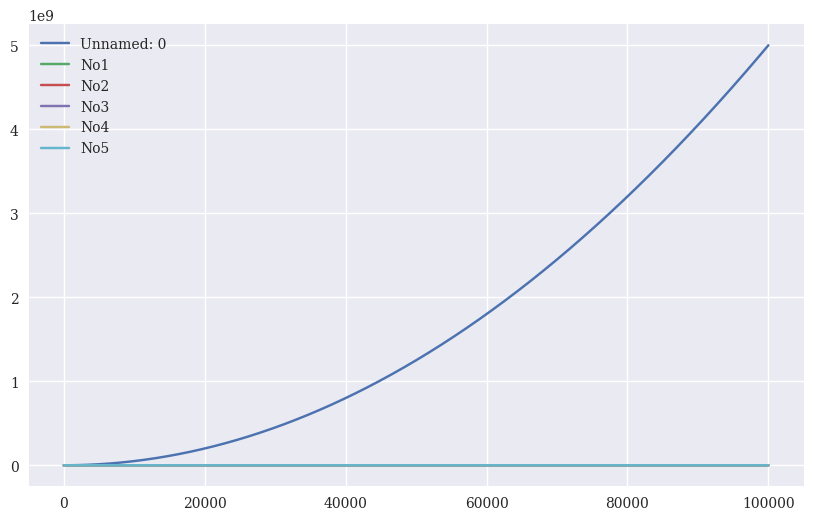

In [120]:
df.cumsum().plot(figsize=(10,6))

In [121]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  43834157 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.csv
-rw-r--r--  1 youngsoom4pro  staff  52633600 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.db
-rw-r--r--  1 youngsoom4pro  staff  48007240 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.h5s
-rw-r--r--  1 youngsoom4pro  staff   4012956 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/numbers.xlsx


In [122]:
!rm -f $path*

In [123]:
import tables as tb
import datetime as dt

In [124]:
filename = path + 'pytab.h5'

In [125]:
h5 = tb.open_file(filename, 'w')

In [126]:
row_des ={
    'Date' : tb.StringCol(26, pos=1),
    'No1' :  tb.IntCol(pos=2),
    'No2' :  tb.IntCol(pos=3),
    'No3' : tb.Float64Col(pos=4),
    'No4' : tb.Float64Col(pos=5)
}

In [127]:
rows= 2000000

In [128]:
filters = tb.Filters(complevel=0)
# via filters objects, compression levels can e specified , among other things

In [129]:
tab = h5.create_table('/', 'int_floats', row_des, title='Integers and Floats', expectedrows=rows, filters=filters
)

In [130]:
type(tab)

tables.table.Table

In [131]:
tab

/int_floats (Table(np.int64(0),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)

In [132]:
pointer = tab.row

In [133]:
ran_int = np.random.randint(0,10000, size=(rows, 2))

In [134]:
ran_flo = np.random.standard_normal((rows,2)).round(4)

In [135]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i,0]
    pointer['No2'] = ran_int[i,1]
    pointer['No3'] = ran_flo[i,0]
    pointer['No4'] = ran_flo[i,1]
    pointer.append()
tab.flush()

CPU times: user 2.01 s, sys: 35.3 ms, total: 2.04 s
Wall time: 2.09 s


In [136]:
tab

/int_floats (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)

In [137]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  100156248 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytab.h5


In [138]:
dty = np.dtype([('Date', 'S26'),('No1', '<i4'),('No2', '<i4'),('No3', '<f8'),('No4','<f8')])

In [139]:
sarray = np.zeros(len(ran_int), dtype=dty)

In [140]:
sarray[:4]

array([(b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.), (b'', 0, 0, 0., 0.),
       (b'', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [141]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:,0]
sarray['No2'] = ran_int[:,1]
sarray['No3'] = ran_flo[:,0]
sarray['No4'] = ran_flo[:,1]

CPU times: user 15.6 ms, sys: 4.29 ms, total: 19.9 ms
Wall time: 19 ms


In [142]:
%%time
h5.create_table('/','ints_floats_from_array', sarray, title='Integers and Floats', expectedrows=rows, filters=filters)

CPU times: user 4.92 ms, sys: 7.47 ms, total: 12.4 ms
Wall time: 12.4 ms


/ints_floats_from_array (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)

In [143]:
type(h5)

tables.file.File

In [144]:
h5

File(filename=/Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytab.h5, title=np.str_(''), mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) np.str_('')
/int_floats (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)
/ints_floats_from_array (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  

In [145]:
h5.remove_node('/','ints_floats_from_array')
# this remove second table object with teh redundant data.

In [146]:
tab[:3]

array([(b'2026-01-12 15:07:30.209947', 8576, 5991, -0.0528, 0.2468),
       (b'2026-01-12 15:07:30.210072', 2990, 9310, -0.0261, 0.3932),
       (b'2026-01-12 15:07:30.210077', 4400, 4823,  0.9133, 0.2579)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [147]:
tab[:4]['No4']

array([ 0.2468,  0.3932,  0.2579, -0.5582])

In [148]:
%time np.sum(tab[:]['No3'])

CPU times: user 6.45 ms, sys: 11.1 ms, total: 17.5 ms
Wall time: 17 ms


np.float64(88.8542999999997)

In [149]:
%time np.sum(np.sqrt(tab[:]['No1']))

CPU times: user 5.56 ms, sys: 7.39 ms, total: 13 ms
Wall time: 12.3 ms


np.float64(133349920.36892518)

CPU times: user 23 ms, sys: 7.66 ms, total: 30.6 ms
Wall time: 29.9 ms


(array([1.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+01, 1.10000e+02,
        3.80000e+02, 1.32900e+03, 4.13500e+03, 1.09250e+04, 2.58570e+04,
        5.34720e+04, 9.70230e+04, 1.55324e+05, 2.16504e+05, 2.66456e+05,
        2.87214e+05, 2.73180e+05, 2.26867e+05, 1.65167e+05, 1.06402e+05,
        5.99730e+04, 2.96140e+04, 1.28280e+04, 4.93100e+03, 1.64700e+03,
        4.64000e+02, 1.29000e+02, 4.00000e+01, 5.00000e+00, 1.00000e+00]),
 array([-5.6489 , -5.28648, -4.92406, -4.56164, -4.19922, -3.8368 ,
        -3.47438, -3.11196, -2.74954, -2.38712, -2.0247 , -1.66228,
        -1.29986, -0.93744, -0.57502, -0.2126 ,  0.14982,  0.51224,
         0.87466,  1.23708,  1.5995 ,  1.96192,  2.32434,  2.68676,
         3.04918,  3.4116 ,  3.77402,  4.13644,  4.49886,  4.86128,
         5.2237 ]),
 <BarContainer object of 30 artists>)

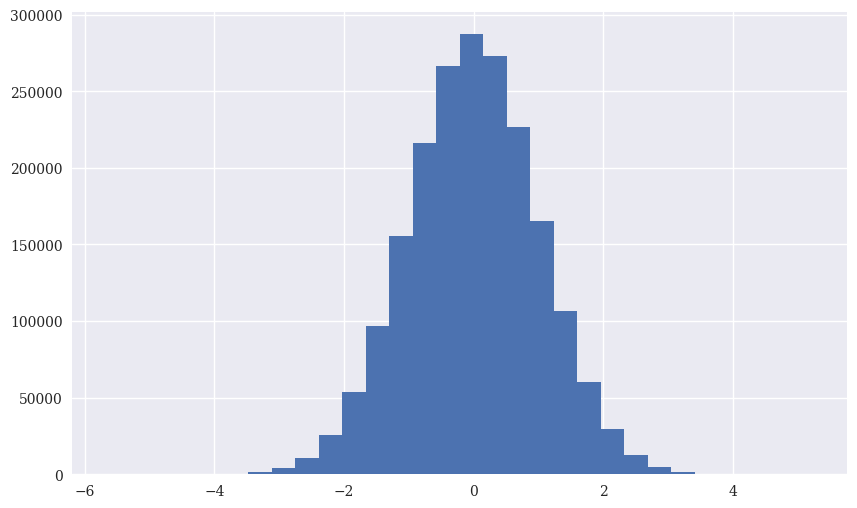

In [150]:
%%time
plt.figure(figsize=(10,6))
plt.hist(tab[:]['No3'], bins=30)

Figure 9-5. Histrogram of columdata

In [151]:
query = '((No3<-0.5)|(No3>0.5))&((No4<-1)|(No4>1))'

In [152]:
iterator = tab.where(query)
# The iterator based on the query

In [153]:
%time res=[(row['No3'], row['No4']) for row in iterator]

CPU times: user 52.5 ms, sys: 13.4 ms, total: 65.9 ms
Wall time: 44.6 ms


In [154]:
res = np.array(res)
res[:3]

array([[0.7694, 1.4866],
       [0.9201, 1.3346],
       [1.4701, 1.8776]])

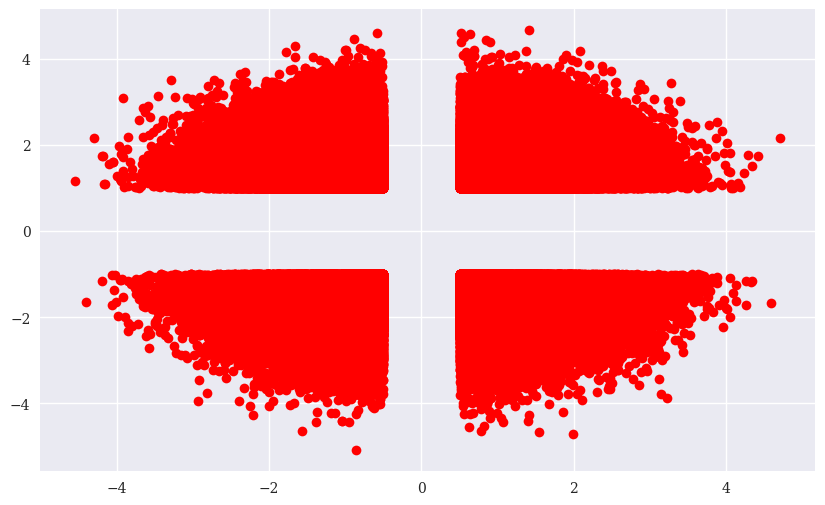

In [155]:
plt.figure(figsize=(10,6))
plt.plot(res.T[0], res.T[1], 'ro')

Figure 9-6. Histogram of column data

In [156]:
%%time
values = tab[:]['No3']
print('Max %18.3f' % values.max())
print('Ave %18.3f' % values.mean())
print('Min %18.3f' % values.min())
print('Std %18.3f' % values.std())

Max              5.224
Ave              0.000
Min             -5.649
Std              1.000
CPU times: user 10.3 ms, sys: 6.64 ms, total: 17 ms
Wall time: 16 ms


In [157]:
%%time
res=[(row['No1'], row['No2']) for row in tab.where('((No1>9800)|(No1<200))&((No2>4500)&(No2<5500))')]

CPU times: user 23.4 ms, sys: 12.3 ms, total: 35.7 ms
Wall time: 15.6 ms


In [158]:
for r in res[:4]:
    print(r)

(91, 4870)
(9803, 5026)
(9846, 4859)
(9823, 5069)


In [159]:
%%time
res = [(row['No1'], row['No2']) for row in tab.where('(No1 == 1234)&(No2> 9776)')]

CPU times: user 11.5 ms, sys: 11.9 ms, total: 23.4 ms
Wall time: 12.1 ms


In [160]:
for r in res:
    print(r)

(1234, 9841)
(1234, 9821)
(1234, 9867)
(1234, 9987)
(1234, 9849)
(1234, 9800)


In [161]:
filename = path+'pytabc.h5'

In [162]:
h5c = tb.open_file(filename, 'w')

In [163]:
filters = tb.Filters(complevel=5, complib='blosc')
# The complevel (compression level) parameter can take values between 0 (no compression) and 9 (highest compression)
# Blosc compression engine is used, which is optimized for performance

In [164]:
tabc = h5c.create_table('/', 'ints_floats', sarray, title='Integers and Floats', expectedrows=rows, filters=filters)

In [165]:
query = '((No3<-0.5)|(No3<0.5))&((No4<-1)|(No4>1))'

In [166]:
iteratorc = tabc.where(query)

In [167]:
%time res = [(row['No3'], row['No4']) for row in iteratorc]

CPU times: user 65.6 ms, sys: 15 ms, total: 80.6 ms
Wall time: 63.5 ms


In [168]:
res = np.array(res)
res[:3]

array([[-0.3663,  1.2476],
       [ 0.4769,  1.4178],
       [-1.4236, -1.5296]])

In [169]:
%time arr_non = tab.read()

CPU times: user 4.31 ms, sys: 9.53 ms, total: 13.8 ms
Wall time: 12.7 ms


In [170]:
tab.size_on_disk

100122200

In [171]:
arr_non.nbytes

100000000

In [172]:
%time arr_com = tabc.read()

CPU times: user 4.39 ms, sys: 9.21 ms, total: 13.6 ms
Wall time: 13 ms


In [173]:
tabc.size_on_disk

99995415

In [174]:
arr_com.nbytes

100000000

In [175]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  200312336 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytab.h5
-rw-r--r--  1 youngsoom4pro  staff  100030711 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytabc.h5


In [176]:
h5c.close()

In [177]:
%%time
arr_int = h5.create_array('/', 'integers', ran_int)
arr_flo = h5.create_array('/', 'floats', ran_flo)


CPU times: user 552 μs, sys: 3.79 ms, total: 4.34 ms
Wall time: 4.35 ms


In [178]:
h5

File(filename=/Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytab.h5, title=np.str_(''), mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) np.str_('')
/floats (Array(2000000, 2)) np.str_('')
  atom := Float64Atom(shape=(), dflt=np.float64(0.0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := None
/int_floats (Table(np.int64(2000000),)) np.str_('Integers and Floats')
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt=np.bytes_(b''), pos=0),
  "No1": Int32Col(shape=(), dflt=np.int32(0), pos=1),
  "No2": Int32Col(shape=(), dflt=np.int32(0), pos=2),
  "No3": Float64Col(shape=(), dflt=np.float64(0.0), pos=3),
  "No4": Float64Col(shape=(), dflt=np.float64(0.0), pos=4)}
  byteorder := 'little'
  chunkshape := (np.int64(2621),)
/integers (Array(2000000, 2)) np.str_('')
  atom := Int64Atom(shape=(), dflt=np.int64(0))
  maindim := 0
  fla

In [179]:
ll $path*

-rw-r--r--  1 youngsoom4pro  staff  262344490 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytab.h5
-rw-r--r--  1 youngsoom4pro  staff  100030711 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/pytabc.h5


In [180]:
h5.close()

In [181]:
!rm -f $path*

In [182]:
filename = path +'earray.h5'

In [183]:
h5 = tb.open_file(filename, 'w')

In [184]:
n= 500

In [185]:
ear = h5.create_earray('/', 'ear', atom=tb.Float64Atom(), shape=(0,n))

In [186]:
type(ear)

tables.earray.EArray

In [187]:
rand = np.random.standard_normal((n,n))
rand[:4,:4]

array([[-1.25983231,  1.11420699,  0.1667485 ,  0.7345676 ],
       [-0.13785424,  1.22232417,  1.36303097,  0.13521042],
       [ 1.45487119, -1.47784078,  0.15027672,  0.86755989],
       [-0.63519366,  0.1516327 , -0.64939447, -0.45010975]])

In [188]:
%%time
for _ in range(750):
    ear.append(rand)
ear.flush()

CPU times: user 73.4 ms, sys: 179 ms, total: 253 ms
Wall time: 301 ms


In [189]:
ear

/ear (EArray(np.int64(375000), np.int64(500))) ''
  atom := Float64Atom(shape=(), dflt=np.float64(0.0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (np.int64(16), np.int64(500))

In [190]:
ear.size_on_disk

1500032000

In [191]:
out = h5.create_earray('/', 'out',atom=tb.Float64Atom(), shape=(0,n))

In [192]:
out.size_on_disk

0

In [193]:
expr = tb.Expr('3*sin(ear)+sqrt(abs(ear))')

In [194]:
expr.set_output(out, append_mode=True)

In [195]:
%time expr.eval()

CPU times: user 1.59 s, sys: 300 ms, total: 1.89 s
Wall time: 532 ms


/out (EArray(np.int64(375000), np.int64(500))) ''
  atom := Float64Atom(shape=(), dflt=np.float64(0.0))
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (np.int64(16), np.int64(500))

In [196]:
out.size_on_disk

1500032000

In [197]:
out[0,:10]

array([-1.73369462,  3.74824436,  0.90627898,  2.86786818,  1.75424957,
       -0.91108973, -1.68313885,  1.29073295, -1.68665599, -1.71345309])

In [198]:
%time out_ =out.read()
# read the whoel EArray into memory

CPU times: user 73.9 ms, sys: 159 ms, total: 233 ms
Wall time: 239 ms


In [199]:
out[0,:10]

array([-1.73369462,  3.74824436,  0.90627898,  2.86786818,  1.75424957,
       -0.91108973, -1.68313885,  1.29073295, -1.68665599, -1.71345309])

In [200]:
import numexpr as ne
# import module for in-memory evaluations of numericla expressions.

In [201]:
expr = '3 * sin(out_)+sqrt(abs(out_))'
# numerical expression as a str object.

In [202]:
ne.set_num_threads(1)
# sets the number of threads to one.

12

In [203]:
%time ne.evaluate(expr)[0,:10]
# evaluates the numerical expression in -memory with one thread

CPU times: user 1.19 s, sys: 61.7 ms, total: 1.26 s
Wall time: 1.26 s


array([-1.64358578,  0.22567882,  3.31363043,  2.50443549,  4.27413965,
       -1.41600606, -1.68373023,  4.01921805, -1.68117412, -1.66053597])

In [204]:
ne.set_num_threads(4)
# set number thread four

1

In [205]:
%time ne.evaluate(expr)[0,:10]
# evaluates the numerical expression in0meory with four threads.

CPU times: user 1.27 s, sys: 119 ms, total: 1.39 s
Wall time: 354 ms


array([-1.64358578,  0.22567882,  3.31363043,  2.50443549,  4.27413965,
       -1.41600606, -1.68373023,  4.01921805, -1.68117412, -1.66053597])

In [206]:
h5.close()

In [207]:
!rm -f $path*

In [208]:
no = 5000000 # n of time steps
co = 3 # n of time series
interval = 1./(12*30*24*60) # the time interval as a year fraction
vol =0.2 # the volatility

In [209]:
%%time
rn = np.random.standard_normal((no,co))
rn[0] = 0.0
paths = 100 * np.exp(np.cumsum(-0.5*vol**2*interval+ vol*np.sqrt(interval)*rn, axis=0)) # the simulation based on an euler discretization.
paths[0] =100

CPU times: user 213 ms, sys: 18.4 ms, total: 231 ms
Wall time: 231 ms


In [210]:
dr = pd.date_range('2019-1-1', periods=no, freq='1s')

In [211]:
dr[-6:]

DatetimeIndex(['2019-02-27 20:53:14', '2019-02-27 20:53:15',
               '2019-02-27 20:53:16', '2019-02-27 20:53:17',
               '2019-02-27 20:53:18', '2019-02-27 20:53:19'],
              dtype='datetime64[ns]', freq='s')

In [212]:
df = pd.DataFrame(paths, index=dr, columns=['ts1', 'ts2', 'ts3'])

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2019-01-01 00:00:00 to 2019-02-27 20:53:19
Freq: s
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   ts1     float64
 1   ts2     float64
 2   ts3     float64
dtypes: float64(3)
memory usage: 152.6 MB


In [214]:
df.head()

,ts1,ts2,ts3
2019-01-01 00:00:00,100.000000,100.000000,100.000000
2019-01-01 00:00:01,100.018443,99.966644,99.998255
2019-01-01 00:00:02,100.069023,100.004420,99.986646
2019-01-01 00:00:03,100.086757,100.000246,99.992042
2019-01-01 00:00:04,100.105448,100.036033,99.950618


<Axes: >

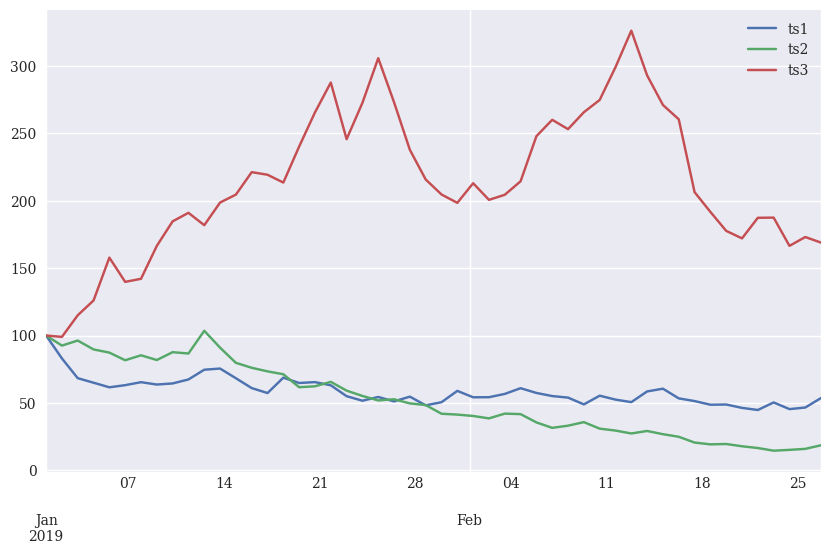

In [215]:
df[::100000].plot(figsize=(10,6))

Figure 9-7. Selected data points of the financial time series


In [216]:
!pip install tstables


In [217]:
import tstables as tstab

In [218]:
class ts_desc(tb.IsDescription):
    timestamp = tb.Int64Col(pos=0)
    ts1 = tb.Float64Col(pos=1)
    ts2 = tb.Float64Col(pos=2)
    ts3 = tb.Float64Col(pos=3)

In [219]:
h5 = tb.open_file(path + 'tstab.h5','w')

In [220]:
ts = h5.create_ts('/', 'ts', ts_desc)

In [ ]:
%time ts.append(df)

#error occurred..

CPU times: user 35 μs, sys: 1e+03 ns, total: 36 μs
Wall time: 38.1 μs


AttributeError: module 'pandas.tseries' has no attribute 'index'

In [ ]:
type(ts)

tstables.tstable.TsTable

In [225]:
ls -n $path*

-rw-r--r--  1 501  20  96 Jan 12 15:07 /Users/youngsoom4pro/Documents/GitHub/Python_Finance/Chap9/data/tstab.h5


In [229]:
!rm -f $path*